# SI221 Practical assignement 2 
## k-Nearest Neighbors 

### 1- k-NN classification: Synthetic dataset

---
#### Question 1



In [34]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

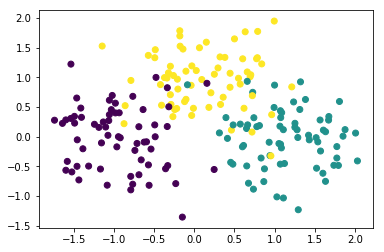

In [108]:
def generate_dataset(sigma):
  x,y = make_blobs(n_samples=300, centers=[[-1,0],[1,0],[0,1]], cluster_std=sigma)

  '''
  x_train = x[:200]
  x_test = x[200:]
  y_train = y[:200]
  y_test = y[200:]
  '''
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

  return X_train,y_train, X_test,y_test

X_train,y_train,X_test,y_test = generate_dataset(0.50)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)


In [110]:
def distance(x1,x2):
  a = x1[0] - x2[0] 
  b = x1[1] - x2[1]
  return np.sqrt(a**2 + b**2)

In [111]:
def sort_distance(x,X_train):
  dist = []
  for i in range(len(X_train)) :
    dist.append([i,distance(x,X_train[i])])
  # Tri 
  for i in range(1, len(dist)): 
        k = dist[i] 
        j = i-1
        while j >= 0 and k[1] < dist[j][1] : 
                dist[j + 1] = dist[j] 
                j -= 1
        dist[j + 1] = k
  return dist


In [112]:
def kNN(X_train,labels,x,k):
  dist = sort_distance(x,X_train)[:k]
  ret = [0,0,0]

  for i in range(k):
    ri = dist[i][0]
    y_i = labels[ri]
    ret[y_i] += 1

    '''
    label = 0 
    for i in range(1,3):
      if ret[i] > ret[label] :
        label = i
    '''
    
    label = np.argmax(ret)
  
  return label

print(kNN(X_train,y_train,X_test[50],5))

0


In [113]:
def predict(X_train, X_test, y_train, y_test, k):
  y_predict = np.zeros(len(X_test), dtype=int)
  error = 0
  for i in range(len(X_test)):
    y_predict[i] = kNN(X_train, y_train, X_test[i], k)
    if(y_predict[i] != y_test[i]):
      error += 1
  return error/len(X_test)

In [114]:
def predict_some_K(X_train, X_test, y_train, y_test, K):
  errors = np.zeros(len(K), dtype=int)
  for k in range(len(K)):
    errors[k] = predict(X_train, X_test,y_train,y_test,K[k])
  return errors

K = [1,2,5,10]
print(predict_some_K(X_train, X_test, y_train, y_test, K))

[0 0 0 0]


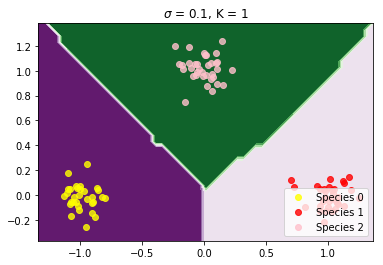

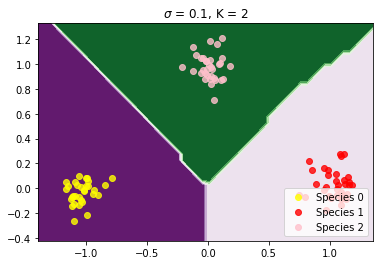

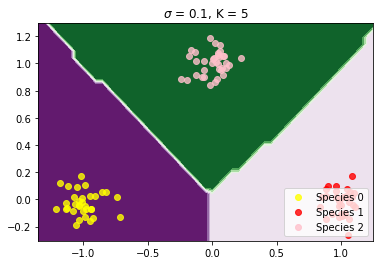

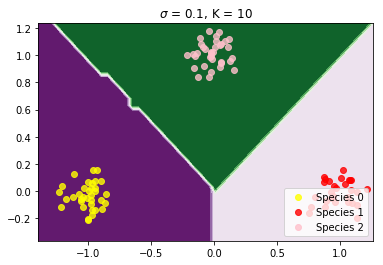

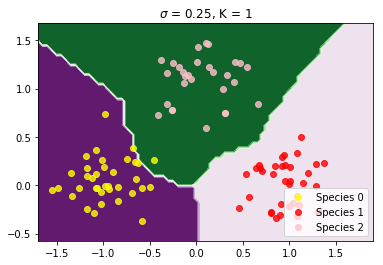

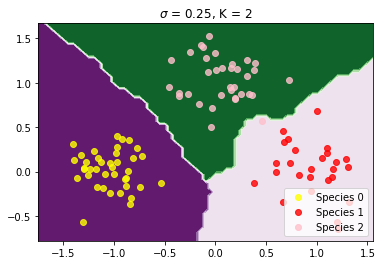

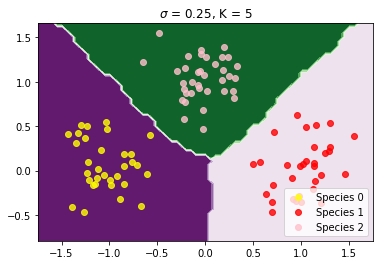

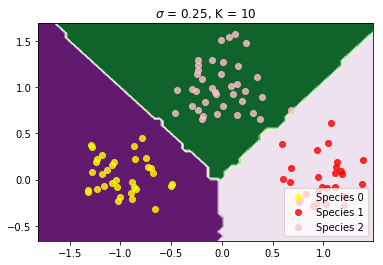

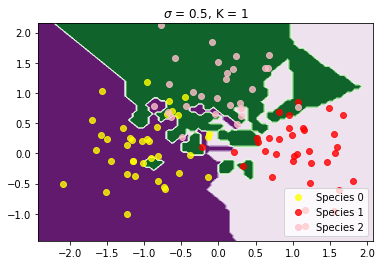

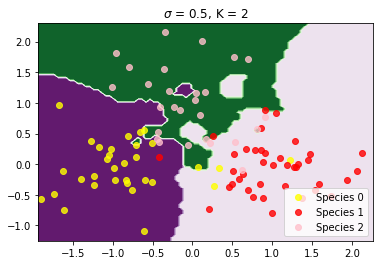

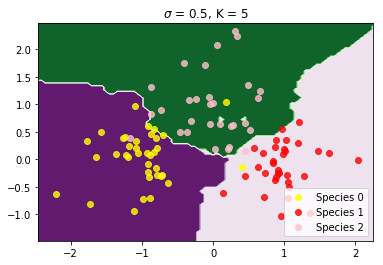

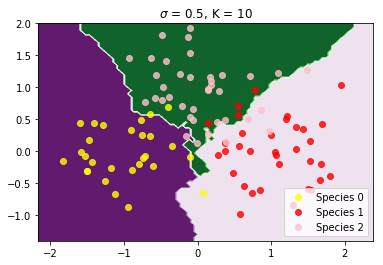

In [126]:
def plot_decision_boundary_k(k):
    colors = {0: 'yellow', 1: 'red', 2: 'pink'}
    x_min, x_max = X_train[:, 0].min()-0.1, X_train[:, 0].max()+0.1
    y_min, y_max = X_train[:, 1].min()-0.1, X_train[:, 1].max()+0.1

    # Get decision boundaries from model
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    inp = np.c_[xx.ravel(), yy.ravel()]

    Z = []
    for i in range(len(inp)):
        Z.append(kNN(X_train, y_train, inp[i], k))

    Z = np.array(Z).reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
    plt.axis('tight')

    # Plot your testing points as wel
    for label in np.unique(y_test):
        indices = np.where(y_test == label)
        plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                    label='Species {}'.format(label))

    plt.legend(loc='lower right')
    plt.title('$\sigma$ = {}, K = {}'.format(sigma,k))
    plt.show(block=False)
    
sigmas = [0.1,0.25,0.5]
K = [1,2,5,10]
for sigma in sigmas:
    for k in K:
        X_train,y_train,X_test,y_test = generate_dataset(sigma)
        plot_decision_boundary_k(k)

#### Question 2

In [8]:
def run_N_dataset(N,sig,k):
  err = []
  for i in range(N):
    X_train,y_train,X_test,y_test = generate_dataset(sig)
    err.append(predict(X_train, X_test, y_train, y_test, k))
  err = np.array(err)
  return err.mean(), err.std()

K = 5
print(run_N_dataset(50,0.05,K))

(0.0, 0.0)


[0.     0.0042 0.0458 0.1562] [0.         0.00635295 0.02409066 0.03565894]


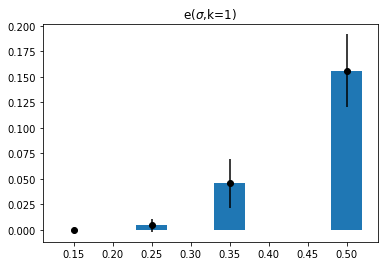

[0.     0.0042 0.0494 0.1634] [0.         0.00695414 0.02101523 0.03502057]


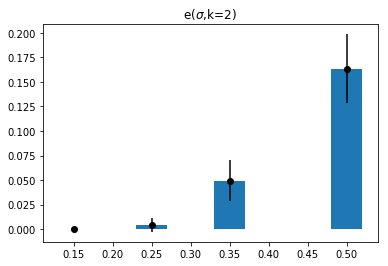

[0.     0.0034 0.0344 0.1182] [0.         0.0065146  0.02031354 0.02605302]


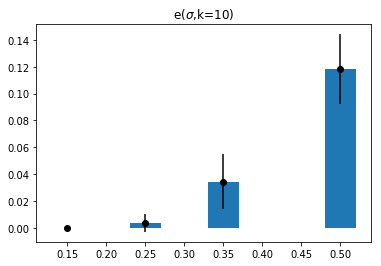

In [9]:
#with fixed k and differents sigma
def run_N_dataset_sigmas(N,sigmas,k):
  err = np.zeros(len(sigmas))
  dev = np.zeros(len(sigmas))
  for sig in range(len(sigmas)):
    err[sig], dev[sig] = run_N_dataset(N,sigmas[sig],k)
  return err,dev

sigmas = [0.15,0.25,0.35,0.5]
K = [1,2,10]
for k in K:
  err, s = run_N_dataset_sigmas(50,sigmas,k)
  print(err,s)
  plt.bar(sigmas,err, width=0.04, align='center')
  plt.errorbar(sigmas,err,yerr=s, color='black', fmt='o')
  plt.title("e($\sigma$,k="+str(k)+") ")
  plt.savefig("q1.png")
  plt.show(block=False)

[0.0006 0.0006 0.0002 0.0004 0.0006 0.    ] [0.00237487 0.00237487 0.0014     0.00195959 0.00237487 0.        ]


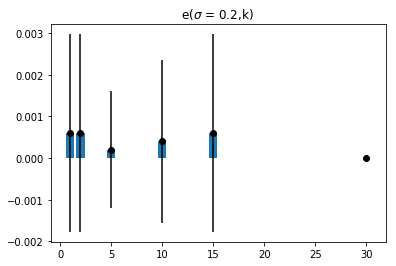

[0.0822 0.0862 0.0594 0.0588 0.0568 0.058 ] [0.0292089  0.03297817 0.02525153 0.01935355 0.02257787 0.02172556]


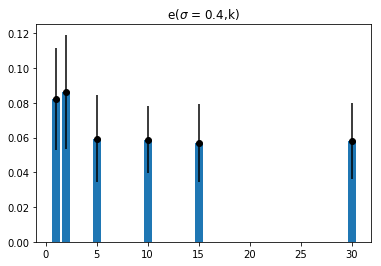

[0.1546 0.1654 0.1164 0.1202 0.126  0.1206] [0.04396408 0.03317891 0.02964861 0.0270917  0.03954744 0.03264414]


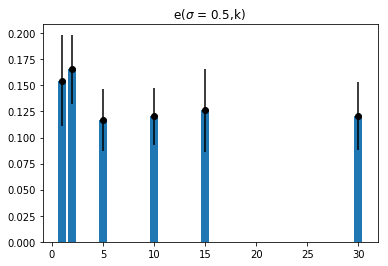

[0.248  0.245  0.1866 0.1832 0.1766 0.1788] [0.03919184 0.04976947 0.04236083 0.03331306 0.0414058  0.04082352]


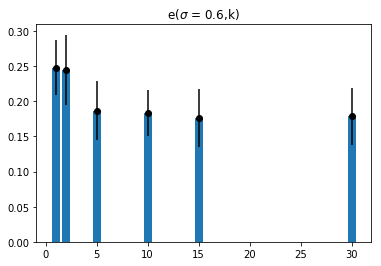

In [10]:
#with fixed sigma and differents k
def run_N_dataset_K(N,sig,K):
  err = np.zeros(len(K))
  dev = np.zeros(len(K))
  for k in range(len(K)):
    err[k], dev[k] = run_N_dataset(N,sig,K[k])
  return err,dev

sigmas = [0.2,0.4,0.5,0.6]
K = [1,2,5,10,15,30]
for sig in sigmas:
  err, s = run_N_dataset_K(50,sig,K)
  print(err,s)
  plt.bar(K,err, width=0.8, align='center')
  plt.errorbar(K,err,yerr=s, color='black', fmt='o')
  plt.title("e($\sigma$ = "+str(sig)+",k) ")
  plt.savefig("q1.png")
  plt.show(block=False)

### 2- k-NN regression: Szeged-weather dataset

---
#### Question 1


In [11]:
import pandas as pd

df=pd.read_csv('weatherHistory.csv', index_col=0)
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [12]:
temperature = np.array(df["Temperature (C)"])
humidity = np.array(df["Humidity"])
apparent_temp = np.array(df["Apparent Temperature (C)"])

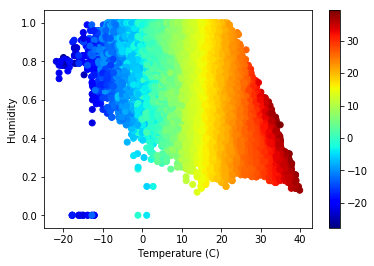

In [13]:
#Permet d'afficher la température ressentie (couleur) en fonction 
#de l'humidité et de la température
plt.scatter(temperature,humidity,c=apparent_temp,cmap="jet")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.colorbar()
plt.show(block= False)

#### Question 2

In [14]:
dataset = np.transpose((temperature[0:2000],humidity[0:2000],apparent_temp[0:2000]))
np.random.permutation(dataset)

#x correspond au 2 première colonne, et y à la troisième
x = [(row[0],row[1]) for row in dataset]
y = [row[2] for row in dataset]

X1 = x[0:400]
X2 = x[400:800]
X3 = x[800:1200]
X4 = x[1200:1600]
X5 = x[1600:2000]

y1 = y[0:400]
y2 = y[400:800]
y3 = y[800:1200]
y4 = y[1200:1600]
y5 = y[1600:2000]

X=[X1,X2,X3,X4,X5]
Y=[y1,y2,y3,y4,y5]

In [15]:
def kNN_q2(X_train,labels,x,k):
  dist = sort_distance(x,X_train)[:k]
  ret = 0.0

  for i in range(k):
    ri = dist[i][0]
    ret += labels[ri]
    
  return ret/k

In [16]:
def predict_q2(X_train, X_test, y_train, y_test, k):
    y_predict = np.zeros(len(X_test), dtype=int)
    error = 0
    for i in range(len(X_test)):
        y_predict[i] = kNN_q2(X_train, y_train, X_test[i], k)
        error += abs(y_predict[i]-y_test[i])
    return error / len(X_test)

In [17]:
def repeat_5_times(k):
    err = np.zeros(5)
    for i in range(5):
        X_test = X[i]
        y_test = Y[i]
        X_train = np.concatenate(np.delete(X,i,0))
        y_train = np.concatenate(np.delete(Y,i,0))
        err[i] = predict_q2(X_train, X_test, y_train, y_test, k)
    return err.mean(), err.std()

In [18]:
e,s = repeat_5_times(1)
print(e, s)

0.9784500000000005 0.5341363590379301


In [19]:
e,s = repeat_5_times(10)
print(e, s)

0.9637277777777781 0.43333682571598375


0.9894388888888892 0.5037075796708855
0.9543944444444449 0.4939376405916138
0.9573166666666669 0.45815134125844686
0.9524222222222226 0.4585022419906951
0.9372111111111113 0.4466716280646235
0.9554944444444449 0.451169097651785
0.9634555555555557 0.45152260185351495
0.965277777777778 0.43124660698253686
0.9637277777777781 0.43333682571598375


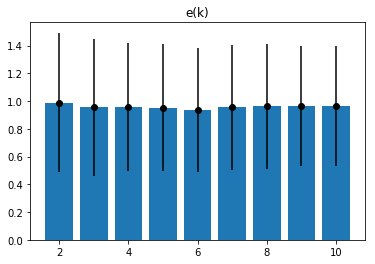

In [20]:
def repeat_5_with_K(K):
    e = np.zeros(len(K))
    s = np.zeros(len(K))
    for k in range(len(K)):
        e[k],s[k] = repeat_5_times(K[k])
        print(e[k],s[k])
    plt.bar(K,e, width=0.8, align='center')
    plt.errorbar(K,e,yerr=s, color='black', fmt='o')
    plt.title("e(k)")
    plt.show(block=False)
        
K = [2,3,4,5,6,7,8,9,10]
repeat_5_with_K(K)

### 3- k-NN classification: MNIST dataset

---



In [21]:
import scipy.io
train = scipy.io.loadmat("data_app.mat")
test = scipy.io.loadmat("data_test.mat")

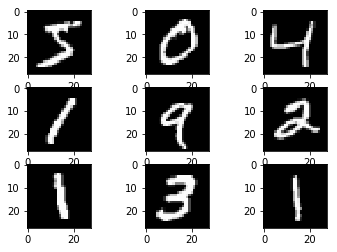

In [22]:
fig, axs = plt.subplots(3,3)
'''Display 9 images from the set.
'''
for i in range(9):
    im=train['x'][i]
    im = im.reshape((28,28))
    image_c = im.astype(float) / 255
    # On affiche une image pour chaque subfigure
    axs[i//3, i%3].imshow(image_c,cmap='gray')

Text(0.5,1,'Histogram for the train set')

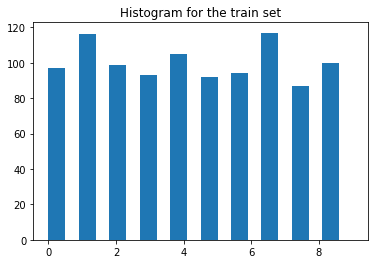

In [23]:
'''Plot the histograms
'''

labels_train = train['S']
labels_train = labels_train.reshape(len(labels_train))
for i in range(len(labels_train)):
    if labels_train[i] == 10:
        labels_train[i] = 0
        

labels_test = test['S']
labels_test = labels_test.reshape(len(labels_test))
for i in range(len(labels_test)):
    if labels_test[i] == 10:
        labels_test[i] = 0

plt.hist(labels_train, width = 0.5)
plt.title("Histogram for the train set")


Text(0.5,1,'Histogram for the test set')

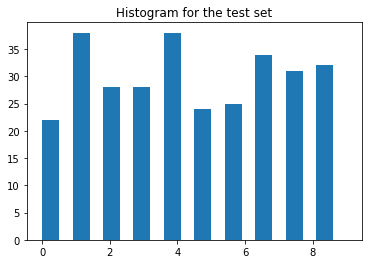

In [24]:
plt.hist(labels_test, width = 0.5)
plt.title("Histogram for the test set")

In [25]:
#The data distribution seems to follow a uniform law
data_test = np.array(test['x'])
data_train = np.array(train['x'])

def kNN_3(X_train, labels,x,k):
    dist = sort_distance(x,X_train)[:k]
    ret = [0 for i in range(10)]

    for i in range(k):
        ri = dist[i][0]
        y_i = labels[ri]
        ret[y_i] += 1

  
    label = np.argmax(ret)

    return label
# K = 1 
error = 0 
for i in range(len(data_test)):
    exp_label = labels_test[i]
    label = kNN_3(data_train, labels_train,data_test[i],1)
    print("Exepected label: "+str(exp_label)+ ", get: "+str(label))
    if exp_label != label:
        error+=1
        
print("Error rate: " +str(error/len(data_test)))
    
    

Exepected label: 0, get: 5
Exepected label: 7, get: 5
Exepected label: 1, get: 5
Exepected label: 1, get: 5
Exepected label: 4, get: 5
Exepected label: 9, get: 5
Exepected label: 4, get: 5
Exepected label: 3, get: 5
Exepected label: 4, get: 5
Exepected label: 8, get: 5
Exepected label: 2, get: 5
Exepected label: 2, get: 5
Exepected label: 1, get: 5
Exepected label: 8, get: 5
Exepected label: 7, get: 5
Exepected label: 0, get: 5
Exepected label: 8, get: 5
Exepected label: 1, get: 5
Exepected label: 0, get: 5
Exepected label: 7, get: 5
Exepected label: 6, get: 5
Exepected label: 3, get: 5
Exepected label: 7, get: 5
Exepected label: 7, get: 5
Exepected label: 5, get: 5
Exepected label: 8, get: 5
Exepected label: 8, get: 5
Exepected label: 9, get: 5
Exepected label: 0, get: 5
Exepected label: 0, get: 5
Exepected label: 4, get: 5
Exepected label: 1, get: 5
Exepected label: 5, get: 5
Exepected label: 2, get: 5
Exepected label: 2, get: 5
Exepected label: 3, get: 5
Exepected label: 9, get: 5
E

In [26]:
# K = 3
error = 0 
for i in range(len(data_test)):
    exp_label = labels_test[i]
    label = kNN_3(data_train, labels_train,data_test[i],3)
    print("Exepected label: "+str(exp_label)+ ", get: "+str(label))
    if exp_label != label:
        error+=1
        
print("Error rate: " +str(error/len(data_test)))

Exepected label: 0, get: 0
Exepected label: 7, get: 0
Exepected label: 1, get: 0
Exepected label: 1, get: 0
Exepected label: 4, get: 0
Exepected label: 9, get: 0
Exepected label: 4, get: 0
Exepected label: 3, get: 0
Exepected label: 4, get: 0
Exepected label: 8, get: 0
Exepected label: 2, get: 0
Exepected label: 2, get: 0
Exepected label: 1, get: 0
Exepected label: 8, get: 0
Exepected label: 7, get: 0
Exepected label: 0, get: 0
Exepected label: 8, get: 0
Exepected label: 1, get: 0
Exepected label: 0, get: 0
Exepected label: 7, get: 0
Exepected label: 6, get: 0
Exepected label: 3, get: 0
Exepected label: 7, get: 0
Exepected label: 7, get: 0
Exepected label: 5, get: 0
Exepected label: 8, get: 0
Exepected label: 8, get: 0
Exepected label: 9, get: 0
Exepected label: 0, get: 0
Exepected label: 0, get: 0
Exepected label: 4, get: 0
Exepected label: 1, get: 0
Exepected label: 5, get: 0
Exepected label: 2, get: 0
Exepected label: 2, get: 0
Exepected label: 3, get: 0
Exepected label: 9, get: 0
E

In [27]:
# K = 5 
error = 0 
for i in range(len(data_test)):
    exp_label = labels_test[i]
    label = kNN_3(data_train, labels_train,data_test[i],5)
    print("Exepected label: "+str(exp_label)+ ", get: "+str(label))
    if exp_label != label:
        error+=1
        
print("Error rate: " +str(error/len(data_test)))

Exepected label: 0, get: 0
Exepected label: 7, get: 0
Exepected label: 1, get: 0
Exepected label: 1, get: 0
Exepected label: 4, get: 0
Exepected label: 9, get: 0
Exepected label: 4, get: 0
Exepected label: 3, get: 0
Exepected label: 4, get: 0
Exepected label: 8, get: 0
Exepected label: 2, get: 0
Exepected label: 2, get: 0
Exepected label: 1, get: 0
Exepected label: 8, get: 0
Exepected label: 7, get: 0
Exepected label: 0, get: 0
Exepected label: 8, get: 0
Exepected label: 1, get: 0
Exepected label: 0, get: 0
Exepected label: 7, get: 0
Exepected label: 6, get: 0
Exepected label: 3, get: 0
Exepected label: 7, get: 0
Exepected label: 7, get: 0
Exepected label: 5, get: 0
Exepected label: 8, get: 0
Exepected label: 8, get: 0
Exepected label: 9, get: 0
Exepected label: 0, get: 0
Exepected label: 0, get: 0
Exepected label: 4, get: 0
Exepected label: 1, get: 0
Exepected label: 5, get: 0
Exepected label: 2, get: 0
Exepected label: 2, get: 0
Exepected label: 3, get: 0
Exepected label: 9, get: 0
E

In [28]:
# Confusion matrix

def confusion_matrix():
    '''We use directly our data set, and K=5 
    '''
    matrix = np.zeros((10,10))
    for i in range(len(data_test)):
        exp_label = labels_test[i]
        label = kNN_3(data_train, labels_train,data_test[i],5)
        matrix[exp_label][label] += 1 
    return matrix
        
print(confusion_matrix())

[[22.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [38.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [28.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [28.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [38.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [24.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [25.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [34.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [31.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [32.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
